# Weighted Fit to a Polynomial

*June 9, 2021*

In this script we will fit a polynomial to a set of experimental data.  The fit will be weighted by the measurement uncertainties.  This tutorial is very similar to the weighted linear fit tutorial, so let's get to it!

Updated by Jordan Andrews on June 9, 2021 with the use of np.polynomial.Polynomial([a, b, c]).

Enter the data.  Suppose that $y$ is the number of counts in some kind of counting experiment.  In that case, the error in $y$ is just the square root of the number of counts ($\sqrt{y}$).

In [10]:
import numpy as np
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([6, 16, 27, 62, 95, 130])
errY = np.sqrt(Y)

Plot the data using *plt.errorbar(x,y,e)*.

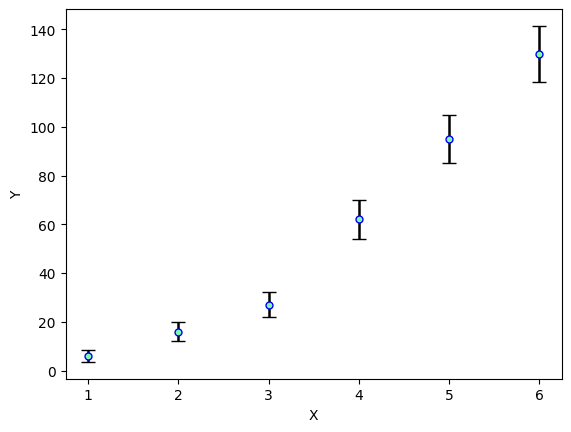

In [11]:
import matplotlib.pyplot as plt
plt.errorbar(X, Y, errY, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                markeredgecolor = 'b',\
                capsize = 5,\
                markerfacecolor = (.49, 1, .63))
plt.xlabel('X')
plt.ylabel('Y');

To do the actual fit, we will use the 'curve_fit()' function from, the *SciPy* module.  This way of fitting is very nice because we use it for all types of fit models (linear, polynomial, line-in-parameter fits, and nonlinear fit).  It is capable of doing both unweighted and weighted fits and it will return uncertainties in the fit parameters.

The first step is to define a function for the model that we will fit our data to.  In this case, the model is a quadratic.

In [12]:
def quadFunc(x, a0, a1, a2):
    y = a2*x**2 + a1*x + a0
    return y

Here is the actual command to execute the fit.  At a minimum, *curve_fit()* requires as inputs the function that defines the model, the $x$-data, and the $y$-data.  The statement below tells *curve_fit()* to return a list of the the best-fit parameters and the covariance matrix which will be used to determine the error in the fit parameters.

In [13]:
from scipy.optimize import curve_fit
a_fit, cov = curve_fit(quadFunc, X, Y)

Print the best-fit parameters.

In [14]:
print('The best-fit parameters are:\n a2 =', a_fit[2], '\n',\
      'a1 =', a_fit[1], '\n',
      'a0 =', a_fit[0])

The best-fit parameters are:
 a2 = 3.803571428577548 
 a1 = -1.1392857142904127 
 a0 = 2.300000000002897


The uncertainties of the best-fit parameters are determined from the square roots of the diagonal elements of the covariance matrix.  We can select the diagonal elements using (Note the use of the unicode character \u0394 to print $\Delta$):

In [15]:
print('The errors in the parameters are:\n \u0394a2 =', np.sqrt(np.diag(cov))[2],\
      '\n', '\u0394a1 =', np.sqrt(np.diag(cov))[1],\
      '\n', '\u0394a0 =', np.sqrt(np.diag(cov))[0])

The errors in the parameters are:
 Δa2 = 0.7749673564844459 
 Δa1 = 5.541603562820195 
 Δa0 = 8.470455002780504


*NumPy* has a nice package for polynomials, called *polynomial*. There are six different polynomial types in this package. For our case, we are dealing with a simple power series. You can use the *Polynomial* constructor for this. y = np.polynomial.Polynomial([a, b, c]) results in $y = a + b\,x + c\,x^2$. 

Here's the best-fit fucntion obtained using *a_fit* from *curve_fit()* and the built in polynomial package of *NumPy*.

In [16]:
fitFcn = np.polynomial.Polynomial(a_fit)
fitFcn

Polynomial([ 2.3       , -1.13928571,  3.80357143], domain=[-1,  1], window=[-1,  1], symbol='x')

This gives us an easy way to plot the fit on top of the data.

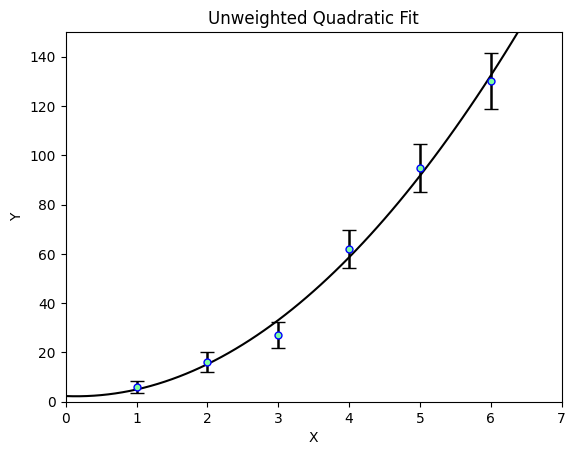

In [17]:
#First reproduce the plot of the data that was generated above.
plt.errorbar(X, Y, errY, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                markeredgecolor = 'b',\
                capsize = 5,\
                markerfacecolor = (.49, 1, .63))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unweighted Quadratic Fit');

# Next, add to that plot the best-fit curve.
xx = np.arange(-1, 10, 0.1)
plt.plot(xx, fitFcn(xx), 'k-')
plt.axis((0, 7, 0, 150));

All of this has produced an "unweighted" fit to the data.  To include weights, all we need to do is include another option in *curve_fit()*. Everything else is exactly the same!  The new option is *sigma* and it is simply a list of the errors in the $y$-values.  Note that many fitting routines require you to provide the actual weights as $1/\sigma^2$.  That is not the case here.  You just have to provide the absolute $y$-uncertainties.

Here's a block of code that does the fit, extracts the best fit function, the best-fit parameters, the uncertainties, and then plots the result.

The best-fit parameters are:      
 a2 ± Δa2 = 4.287328095604868 ± 0.6989651955680412 
 a1 ± Δa1 = -4.430769654410538 ± 4.1352589899192775 
 a0 ± Δa0 = 6.2244252850495565 ± 4.588378516497996


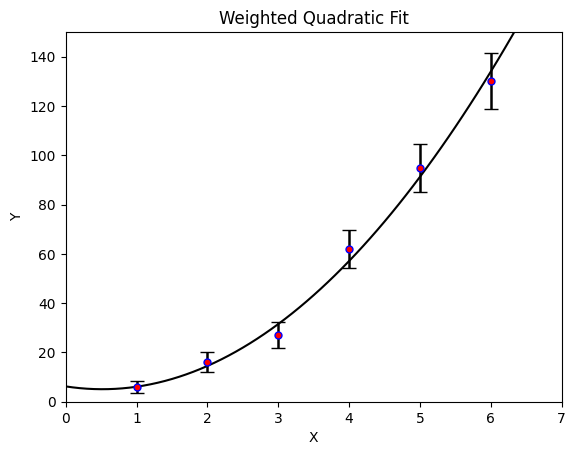

In [18]:
a_fit, cov = curve_fit(quadFunc, X, Y, sigma = errY)

# Extract the fit parameters and their uncertainties.
print('The best-fit parameters are:\
      \n a2 \u00B1 \u0394a2 =', a_fit[2], '\u00B1', np.sqrt(np.diag(cov))[2],\
     '\n a1 \u00B1 \u0394a1 =', a_fit[1], '\u00B1', np.sqrt(np.diag(cov))[1],\
     '\n a0 \u00B1 \u0394a0 =', a_fit[0], '\u00B1', np.sqrt(np.diag(cov))[0])

# Plot the data.
plt.figure()
plt.errorbar(X, Y, errY, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                markeredgecolor = 'b',\
                markerfacecolor = 'r',\
                capsize = 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Weighted Quadratic Fit')

# Get the best-fit line.
fitFcn = np.polynomial.Polynomial(a_fit)

# Plot the best-fit line.
xx = np.arange(-1, 10, 0.1)
plt.plot(xx, fitFcn(xx), 'k-')
plt.axis((0, 7, 0, 150));